In [764]:
# Основной класс, в котором реализуется логика работы предприятия
# Автомобильные перевозки. Парк техники
import functools
import datetime


class SupplyException(Exception):
    pass


class Transit:
    '''Автопарк'''

    def __init__(self, name, address):
        self.name = name
        self.address = address
        self.cars = {}
        self.suppliers = []
        self.clients = []
        self.drivers = []
        self.cities = []
        self.fund = 0

    def accept_supply(self, car, pricelist, total_sum):
        """
        Принять поставку от поставщика.
        Примеры параметров:
        car = {Kenworth: 2, Avia:3} - состав поставленных товаров
        pricelist = {Avia: 10000 FAW: 20000 Cargo: 40000: IVECO:30000 Kenworth:50000} - прайс поставщика
        total_sum - общая сумма по прайс-листу поставщика
        """
        try:
            # Должно быть достаточно средств капитала для приема поставки
            if total_sum > self.fund:
                raise SupplyException("Недостаточно средств.")
            else:
                print('Поставка осуществлена')
            # Пополняем запасы и расплачиваемся за поставку
            for car, amount in car.items():
                if car not in self.cars.keys():
                    self.cars[car] = 0
                self.cars[car] += amount
                self.fund -= amount * pricelist[car]
        except SupplyException as e:
            print("Невозможно осуществить поставку: ", e)

    def accept_order(self, date, client, car, cityfr, cityto, driver, summa):
        """
        Продажа:
        date - дата
        client - заказчик
        car - запрашиваемое авто
        cityfr - пункт выезда
        cityto - пункт назначения
        """
        i = 0
        try:
            if car not in self.cars.keys():
                raise SupplyException('недостаточно авто {}'.format(car))
            else:
                i = 1
            if cityto not in self.cities:
                raise SupplyException('недоступен пункт назначения {}'.format(cityto))
            else:
                i = 1
            if cityfr not in self.cities:
                raise SupplyException('недоступен пункт выезда {}'.format(cityfr))
            else:
                i = 1
        except SupplyException as e:
            print("Невозможно осуществить перевозку: ", e)

        if i ==1:
            self.fund += summa
            print("Принят заказ от {}, {}, {} - {}, везёт {} на сумму {} руб.".format(client, car, cityfr, cityto, driver, summa))
            driver.rollout(date, car, cityfr, cityto, summa)
            client.order(date, cityfr, cityto, car, driver, summa)

    def add_driver(self, driver):
        """ Добавление водителя """
        self.drivers.append(driver)

    def add_client(self, client):
        """ Добавление заказчика """
        self.clients.append(client)

    def add_city(self, city):
        """ Добавление пункта """
        self.cities.append(city)

    def add_car(self, car):
        """ Добавление авто """
        self.cars.append(car)

    def add_supplier(self, supplier):
        """ Добавление поставщика """
        self.suppliers.append(supplier)

    def __repr__(self):
        return self.name

    # Методы для получения и изменения текущего капитала
    def set_fund(self, fund):
        self.fund = fund

    def get_fund(self):
        return self.fund

    # Сохранение прайс-листа
    def set_pricelist(self, pricelist):
        self.pricelist = pricelist


class Auto:
    """
    Авто
    """
    # Список items в классе Auto хранит список всех известных автомобилей
    items = []

    def __init__(self, name):
        self.name = name
        type(self).items.append(self)

    def __repr__(self):
        return self.name


class City:
    """
    Города
    """
    # Список items в классе City хранит список всех известных городов
    items = []

    def __init__(self, name):
        self.name = name
        type(self).items.append(self)

    def __repr__(self):
        return self.name


class Client:
    """ Заказчик """
    items = []

    def __init__(self, name):
        self.name = name
        type(self).items.append(self)

    def __repr__(self):
        return self.name

    def order(self, date, cityfr, cityto, car, driver, summa):
        # Сохраняем данные о заказе в файл
        # Вместо имен и названий сохраняем только номера (ID), из которых потом можно восстановить всю информацию
        with open("clients.txt", 'a+', encoding='utf-8') as file:
            file.write("{:%Y-%m-%d} {} {} {} {} {}\n".format(date,
                                                             Client.items.index(self),
                                                             Auto.items.index(car),
                                                             City.items.index(cityfr),
                                                             City.items.index(cityto),
                                                             Driver.items.index(driver),
                                                             summa
                                                             )
                       )



class Driver:
    """ Водитель """
    items = []

    def __init__(self, name):
        self.name = name
        type(self).items.append(self)

    def rollout(self, date, car, cityfr, cityto, summa):
        with open('drivers.txt', 'a+', encoding='utf-8') as file:
            file.write("{:%Y-%m-%d} {} {} {} {} {}\n".format(date,
                                                          Driver.items.index(self),
                                                          Auto.items.index(car),
                                                          City.items.index(cityfr),
                                                          City.items.index(cityto),
                                                          summa
                                                          )
                       )

    def __repr__(self):
        return self.name


class Supplier:
    """ Оптовый поставщик """

    def __init__(self, name):
        self.name = name
        self.pricelist = {}  # {car_id: price ...}

    def __repr__(self):
        return self.name

    def set_pricelist(self, pricelist):
        self.pricelist = pricelist

    def make_supply(self, store, cars):
        total_sum = functools.reduce(lambda memo, car: memo + self.pricelist[car] * cars[car],
                                     cars, 0)
        print("Общая стоимость поставляемых авто: ", total_sum)
        store.accept_supply(cars, self.pricelist, total_sum)



In [765]:
perevozki = Transit(name = "Гробовозки", address = "ул. Пушкина, дом Колотушкина")

In [766]:
ivanov = Driver('Иванов Сергей Петрович')
petrov = Driver('Петров Александ Ильич')
karantirov = Driver('Карантиров Феофан Саруторович')
sidorov = Driver('Сидоров Евгений Леонидович')

for driver in [ivanov, petrov, karantirov, sidorov]:
    perevozki.add_driver(driver)

In [767]:
perevozki.drivers

[Иванов Сергей Петрович,
 Петров Александ Ильич,
 Карантиров Феофан Саруторович,
 Сидоров Евгений Леонидович]

In [768]:
avia = Auto('Avia')
faw = Auto('FAW')
cargo = Auto('Cargo')
iveco = Auto('IVECO')
kenworth = Auto('kenworth')

In [769]:
semerochka = Client('Семёрочка')
azon = Client('AZON')
dms = Client('DMS')

for client in [semerochka, azon, dms]:
    perevozki.add_client(client)

In [770]:
supplier = Supplier("Major auto")

In [771]:
perevozki.set_fund(100000)

In [772]:
supp = Supplier(name = 'Оптовик +')
supp.set_pricelist({avia: 10000, faw: 20000,  cargo: 30000, iveco: 40000, kenworth: 50000})
supp.make_supply(perevozki, {avia: 3, iveco: 1})

Общая стоимость поставляемых авто:  70000
Поставка осуществлена


In [773]:
supp.make_supply(perevozki, {faw: 2, kenworth:3})

Общая стоимость поставляемых авто:  190000
Невозможно осуществить поставку:  Недостаточно средств.


In [774]:
supp.make_supply(perevozki, {faw: 1})

Общая стоимость поставляемых авто:  20000
Поставка осуществлена


In [775]:
perevozki.get_fund()

10000

In [776]:
piter = City('Снакт-Петербург')
moscow = City('Москва')
tambov = City('Тамбов')
tver = City('Тверь')
tula = City('Тула')
for city in [piter, moscow, tambov, tver, tula]:
    perevozki.add_city(city)

In [777]:
perevozki.cities

[Снакт-Петербург, Москва, Тамбов, Тверь, Тула]

In [778]:
perevozki.accept_order(date = datetime.date(2020, 6, 6),
                car = faw,
                cityfr = moscow,
                cityto = tambov,
                summa = 14000,
                driver = karantirov,
                client = azon
                        )

Принят заказ от AZON, FAW, Москва - Тамбов, везёт Карантиров Феофан Саруторович на сумму 14000 руб.


In [779]:
perevozki.accept_order(date = datetime.date(2020, 6, 6),
                car = cargo,
                cityfr = piter,
                cityto = tver,
                summa = 10500,
                driver = sidorov,
                client = semerochka
                        )

Невозможно осуществить перевозку:  недостаточно авто Cargo


In [780]:
perevozki.accept_order(date = datetime.date(2020, 6, 6),
                car = avia,
                cityfr = piter,
                cityto = moscow,
                summa = 10000,
                driver = ivanov,
                client = dms
                        )

Принят заказ от DMS, Avia, Снакт-Петербург - Москва, везёт Иванов Сергей Петрович на сумму 10000 руб.


In [781]:
perevozki.accept_order(date = datetime.date(2020, 6, 6),
                car = avia,
                cityfr = moscow,
                cityto = tambov,
                summa = 9500,
                driver = petrov,
                client = semerochka
                        )

Принят заказ от Семёрочка, Avia, Москва - Тамбов, везёт Петров Александ Ильич на сумму 9500 руб.


In [782]:
perevozki.accept_order(date = datetime.date(2020, 6, 7),
                car = faw,
                cityfr = tula,
                cityto = tambov,
                summa = 16000,
                driver = petrov,
                client = dms
                        )

Принят заказ от DMS, FAW, Тула - Тамбов, везёт Петров Александ Ильич на сумму 16000 руб.


In [783]:
perevozki.accept_order(date = datetime.date(2020, 6, 8),
                car = avia,
                cityfr = tver,
                cityto = moscow,
                summa = 14000,
                driver = karantirov,
                client = semerochka
                        )

Принят заказ от Семёрочка, Avia, Тверь - Москва, везёт Карантиров Феофан Саруторович на сумму 14000 руб.


In [784]:
perevozki.accept_order(date = datetime.date(2020, 6, 8),
                car = avia,
                cityfr = moscow,
                cityto = tver,
                summa = 18000,
                driver = sidorov,
                client = azon
                        )

Принят заказ от AZON, Avia, Москва - Тверь, везёт Сидоров Евгений Леонидович на сумму 18000 руб.


In [785]:
perevozki.accept_order(date = datetime.date(2020, 6, 8),
                car = avia,
                cityfr = moscow,
                cityto = tambov,
                summa = 12000,
                driver = ivanov,
                client = semerochka
                        )

Принят заказ от Семёрочка, Avia, Москва - Тамбов, везёт Иванов Сергей Петрович на сумму 12000 руб.


In [792]:
data = df.groupby('driver_id').sum()
data


,auto_id,cityfr_id,cityto_id,summa
driver_id,,,,
0,0,1,3,22000
1,1,5,4,25500
2,1,4,3,28000
3,0,1,3,18000


In [793]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [794]:
'''Построим круговую диаграмму водителей по прибыльности'''

'Построим круговую диаграмму водителей по прибыльности'

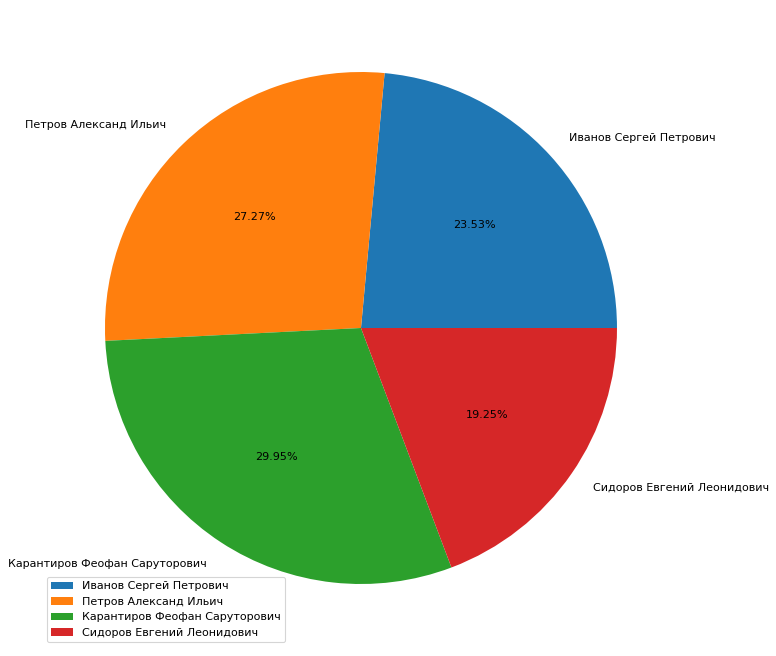

In [795]:
plt.figure(figsize=(12, 8), dpi=80)
plt.axes([0,0,1,1], aspect = 'equal')
Z = data['summa']
# Для получения ФИО сотрудника извлечем его из Driver.items по известному нам ID
plt.pie(Z, autopct = '%1.2f%%', labels = list(map(lambda i: Driver.items[i], data.index)))
plt.legend(loc='lower left')
plt.show()

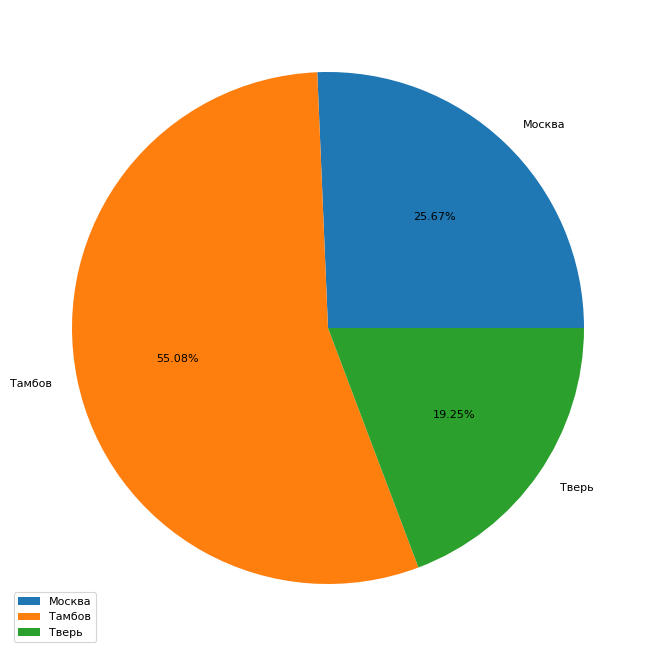

In [808]:
'''Построим круговую диаграмму по прибыльности пунктов назначения'''
data = df.groupby('cityto_id').sum()
data

plt.figure(figsize=(12, 8), dpi=80)
plt.axes([0,0,1,1], aspect = 'equal')
Z = data['summa']
# Для получения заказчика Client.items по известному нам ID
plt.pie(Z, autopct = '%1.2f%%', labels = list(map(lambda i: City.items[i], data.index)))
plt.legend(loc='lower left')
plt.show()

In [796]:
data = df.groupby('date').sum()
data
df = pd.read_csv('drivers.txt', sep=' ', header = None)
df.columns = ["date", 'driver_id', 'auto_id', 'cityfr_id', 'cityto_id', 'summa']
df

,date,driver_id,auto_id,cityfr_id,cityto_id,summa
0,2020-06-06,2,1,1,2,14000
1,2020-06-06,0,0,0,1,10000
2,2020-06-06,1,0,1,2,9500
3,2020-06-07,1,1,4,2,16000
4,2020-06-08,2,0,3,1,14000
5,2020-06-08,3,0,1,3,18000
6,2020-06-08,0,0,1,2,12000


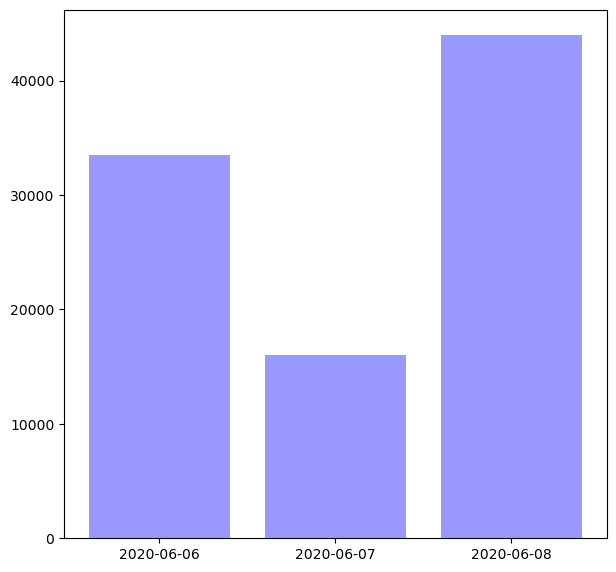

In [797]:
plt.figure(figsize=(7, 7), dpi=100)
X = np.arange(len(data))
Y1 = data['summa']
plt.bar(X, Y1, facecolor='#9999ff', tick_label = data.index)


plt.show()

In [798]:
perevozki.get_fund()
'''Запросим итоговый баланс'''

103500